In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [2]:
from data_analysis import Dataset

In [3]:
run_label = '20210707' ## Change this to look at different runs
d = Dataset(run_label=run_label, gases=['O2', 'CO2'])

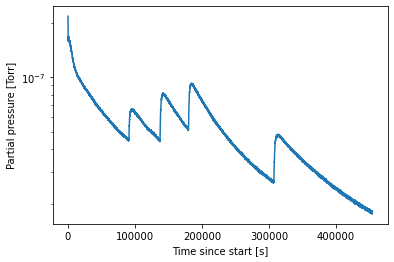

In [4]:
d.GetData()
d.FindPeaks()
d.GetRanges()
d.PlotSingleGas('CO2')

[4.17034355e-07 1.62461732e+03 1.74754572e-03]


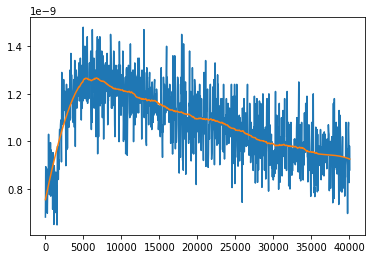

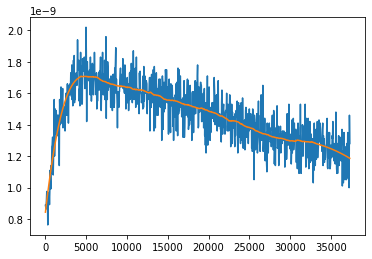

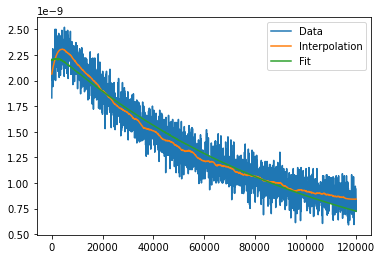

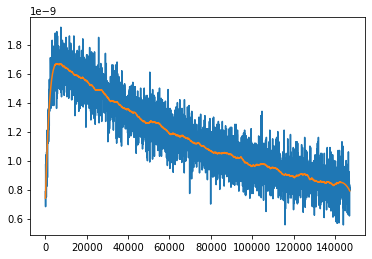

In [5]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

for i,gas in enumerate(d.gases):
    if gas =='CO2':
        continue
    for j,fitrange in enumerate(d.range[gas]):
        try: 
            plt.figure()
            time_offset = np.array(d.data[gas]['exp_time'])[fitrange[0]]
            xdata = np.array(d.data[gas]['exp_time'])[fitrange[0]:fitrange[1]] - time_offset
            ydata = np.array(d.data[gas]['pressure'])[fitrange[0]:fitrange[1]]
            temp = np.array(d.data[gas]['ch2_lerp'])[fitrange[0]:fitrange[1]]

            # interpolation to smooth out the noise
            xx = np.linspace(xdata.min(),xdata.max(), len(xdata))
            itp = interp1d(xdata,ydata, kind='linear')
            window_size, poly_order = 201, 3
            yy_sg = savgol_filter(itp(xx), window_size, poly_order)



            plt.plot(xdata,ydata, label='Data')
            plt.plot(xx,yy_sg, label='Interpolation')
            popt,pcov = curve_fit(d.fitfunction, [xdata,temp], ydata, p0=[1, 2000, 0.005])
            print(popt)

            plt.plot(xdata, d.fitfunction([xdata,temp], *popt), label='Fit')
            plt.legend(loc='upper right')
            plt.show()
        except:
            pass

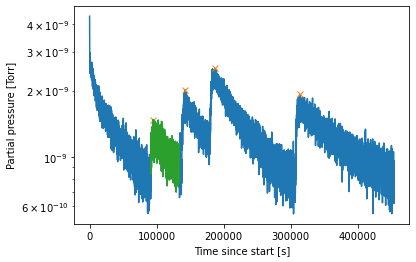

In [6]:
gas = 'O2'
d.PlotSingleGas(gas)
plt.plot(np.array(d.data[gas]['exp_time'])[d.peak_indices[gas]], 
         np.array(d.data[gas]['pressure'])[d.peak_indices[gas]], 'x')
plt.plot(np.array(d.data[gas]['exp_time'])[d.peak_indices[gas][0]-80:d.peak_indices[gas][1]-200], 
         np.array(d.data[gas]['pressure'])[d.peak_indices[gas][0]-80:d.peak_indices[gas][1]-200], 
         ls='-')